In [49]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns 

In [2]:
# Load the data into a DataFrame
df = pd.read_csv('zomato.csv')

In [3]:
# Display the first few rows of the DataFrame
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.columns


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis = 1)

df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [7]:
# Display information about the DataFrame, such as data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [8]:
# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace = True)

# Display the new number of rows and columns in the DataFrame
df.shape

(51609, 11)

In [9]:
# Display the unique values in the 'rate' column
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
# Define a function to handle missing values in 'rate'
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

In [11]:
# Apply the function to 'rate'
df['rate'] = df['rate'].apply(handlerate)

In [12]:
# Display the first few values of the 'rate' column after applying the function
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [13]:
# Fill missing values in 'rate' with the mean value
df['rate'] = df['rate'].fillna(df['rate'].mean())

# Display the first few rows of the DataFrame after filling missing values
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [14]:
# Display information about the DataFrame, including the data types and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [15]:
# Drop rows with any missing values and modify the DataFrame in place
df.dropna(inplace = True)

In [16]:
# Rename columns 'approx_cost(for two people)' and 'listed_in(type)' to 'Cost2plates' and 'Type' respectively, and modify the DataFrame in place
df.rename(columns = {'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'Type'}, inplace = True)

# Display the first 5 rows of the DataFrame after renaming the columns
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [17]:
# Display unique values in the 'location' column
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [18]:
# Display unique values in the 'listed_in(city)' column
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [19]:
# Drop the 'listed_in(city)' column from the DataFrame
df = df.drop(['listed_in(city)'], axis = 1)

In [20]:
# Check unique values in the 'Cost2plates' column
df['Cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [21]:
# Define a function to handle commas in the 'Cost2plates' column

def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)
    
# Apply the function to the 'Cost2plates' column
df['Cost2plates'] = df['Cost2plates'].apply(handlecomma)

# Check unique values in the 'Cost2plates' column after applying the function
df['Cost2plates'].unique()
        

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [22]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [23]:
# Count the number of restaurants for each type and sort them in descending order
rest_types = df['rest_type'].value_counts(ascending  = False)
rest_types

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [24]:
# Count the number of restaurants for each type and sort them in descending order
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

rest_type
Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: count, Length: 85, dtype: int64

In [25]:
# Define a function to handle rest_type
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
        
# Apply the function to 'rest_type'        
df['rest_type'] = df['rest_type'].apply(handle_rest_type)

# Count the number of restaurants for each type
df['rest_type'].value_counts()

rest_type
Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

In [26]:
# Count the number of restaurants for each location
location = df['location'].value_counts(ascending  = False)

# Select locations with less than 300 restaurants
location_lessthan300 = location[location<300]



# Define a function to handle location
def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
        
# Apply the function to 'location'
df['location'] = df['location'].apply(handle_location)

# Count the number of restaurants for each location
df['location'].value_counts()

location
BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
L

In [27]:
# Count the number of restaurants for each cuisine
cuisines = df['cuisines'].value_counts(ascending  = False)


# Select cuisines with less than 100 restaurants
cuisines_lessthan100 = cuisines[cuisines<100]



# Define a function to handle cuisines
def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
        
# Apply the function to 'cuisines'
df['cuisines'] = df['cuisines'].apply(handle_cuisines)

# Count the number of restaurants for each cuisine
df['cuisines'].value_counts()

cuisines
others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000')])

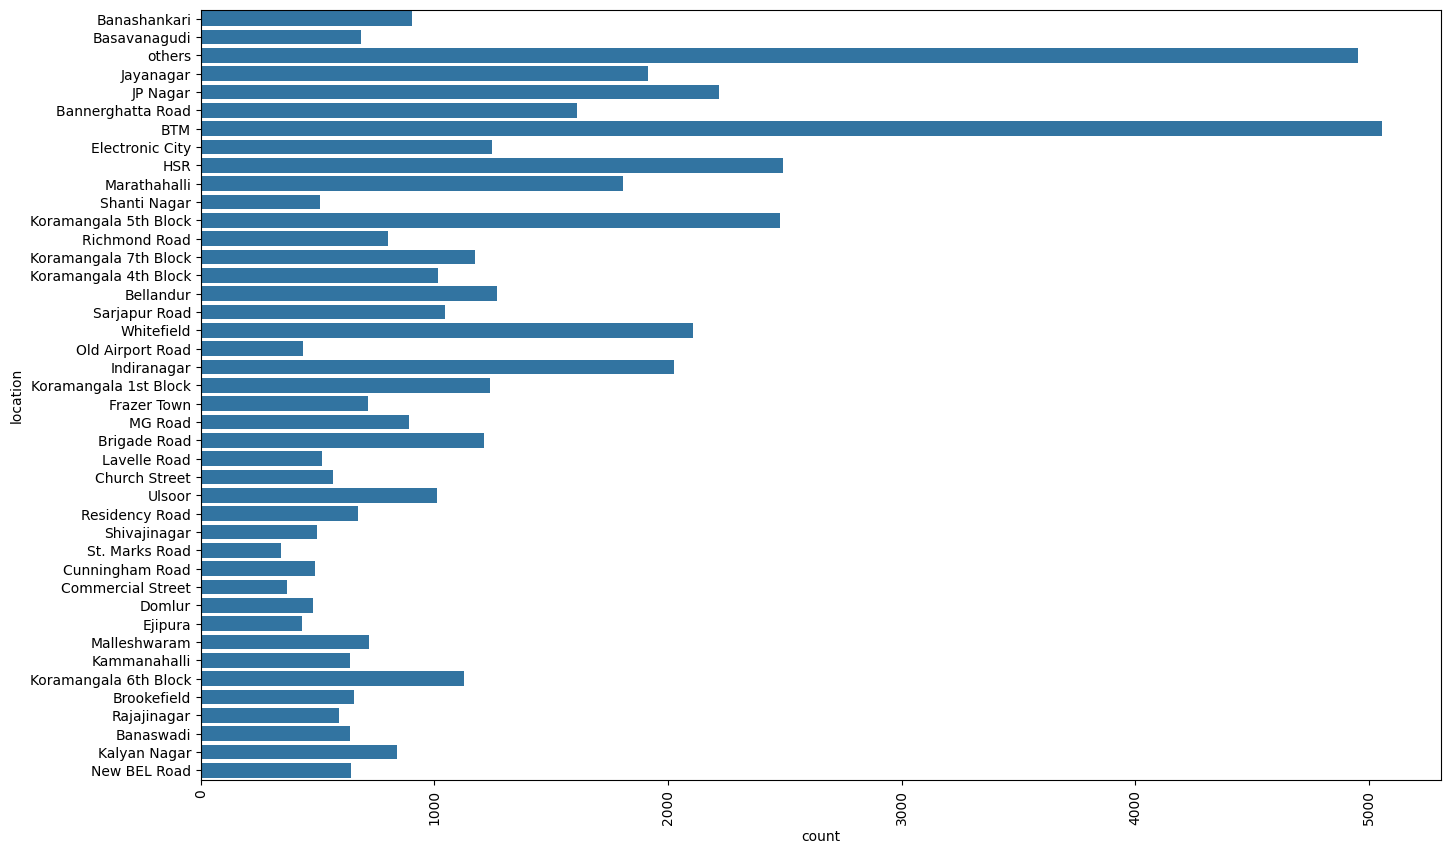

In [28]:
# Create a count plot for 'location' with a larger figure size
plt.figure(figsize = (16,10))

# Plot the count of each location
ax = sns.countplot(df['location'])

# Rotate the x-axis labels to improve readability
plt.xticks(rotation=90)

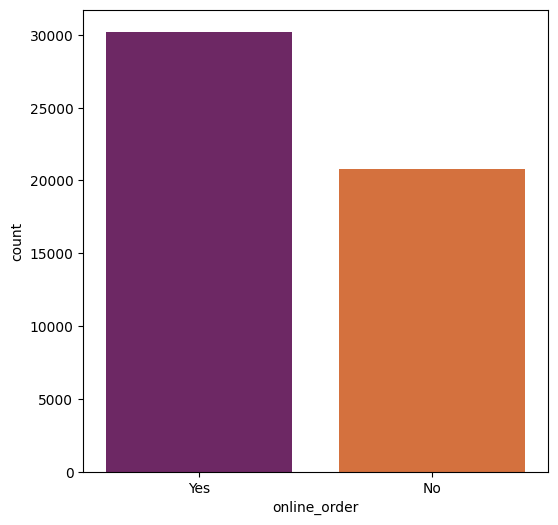

In [29]:
# Create a count plot for 'online_order' with a larger figure size and a specified color palette
plt.figure(figsize = (6,6))
sns.countplot(data=df, x='online_order', hue='online_order', palette = 'inferno')

# Display the plot
plt.show()

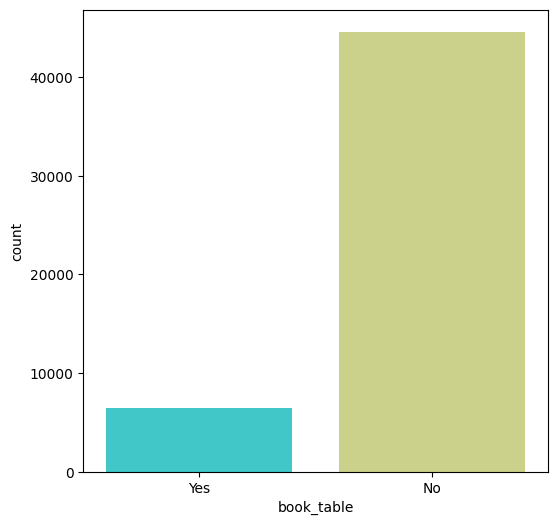

In [30]:
# Create a count plot for 'book_table' with a larger figure size and a specified color palette
plt.figure(figsize = (6,6))
sns.countplot(data=df, x='book_table', hue='book_table', palette = 'rainbow')

#Display the plot
plt.show()

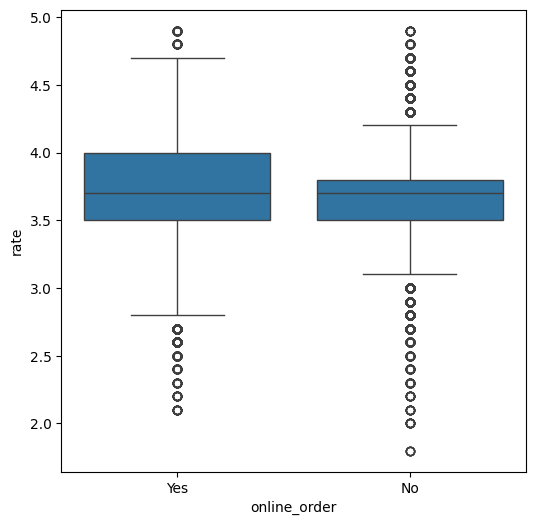

In [31]:
# Create a box plot for 'rate' against 'online_order' with a larger figure size
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

#Display the plot
plt.show()

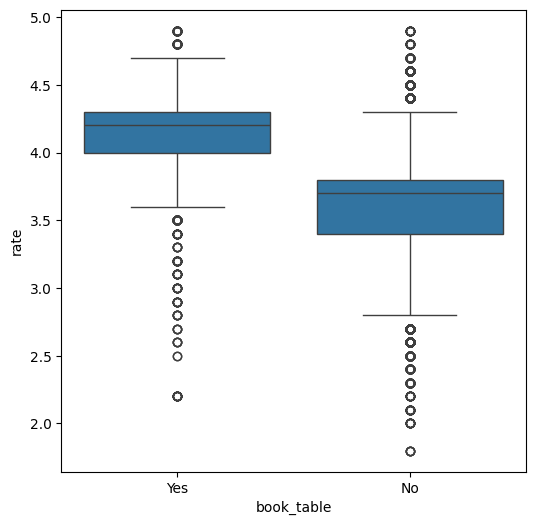

In [32]:
# Create a box plot for 'rate' against 'book_table' with a larger figure size
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = df)

#Display the plot
plt.show()

In [33]:
# Group by 'location' and 'online_order', and count the number of 'name' for each group
df1 = df.groupby(['location','online_order'])['name'].count()

# Save the result to a CSV file
df1.to_csv('location_online.csv')

# Read the CSV file back into a DataFrame
df1 = pd.read_csv('location_online.csv')

# Pivot the DataFrame to get 'location' as index, 'online_order' as columns, and 'name' counts as values
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc='sum')

# Display the resulting DataFrame
df1

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119
others                 2064  2890

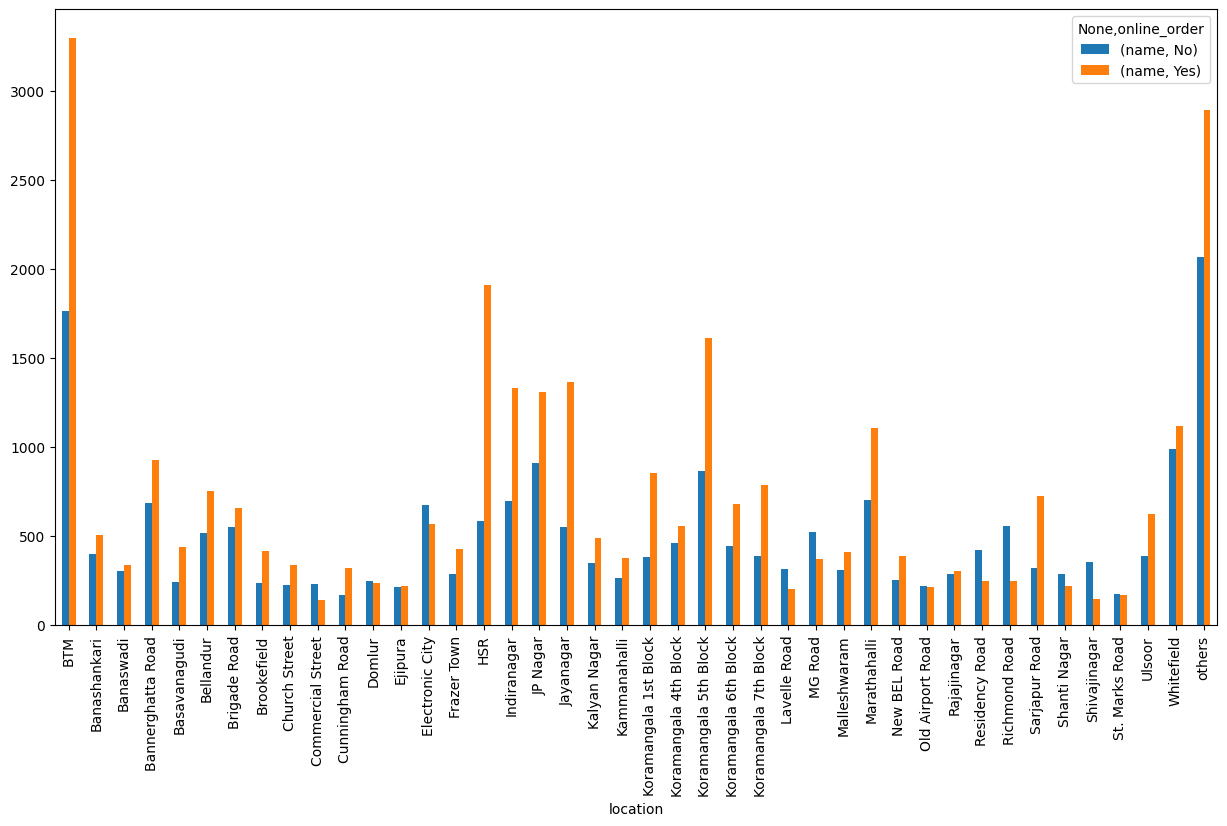

In [34]:
# Plot the DataFrame as a bar chart
df1.plot(kind = 'bar', figsize = (15,8))

#Show the plot
plt.show()


In [35]:
# Group the DataFrame by 'location' and 'book_table' columns, and count the number of occurrences of 'name' in each group
df2 = df.groupby(['location','book_table'])['name'].count()

# Save the grouped DataFrame to a CSV file named 'location_booktable.csv'
df2.to_csv('location_booktable.csv')

# Read the CSV file into a new DataFrame
df2 = pd.read_csv('location_booktable.csv')

# Pivot the DataFrame to create a new DataFrame with 'location' as the index, 'book_table' as columns, and the count of 'name' as values
df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc='sum')

df2


name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Whitefield             1852  253
others                 4587  367

<Axes: xlabel='location'>

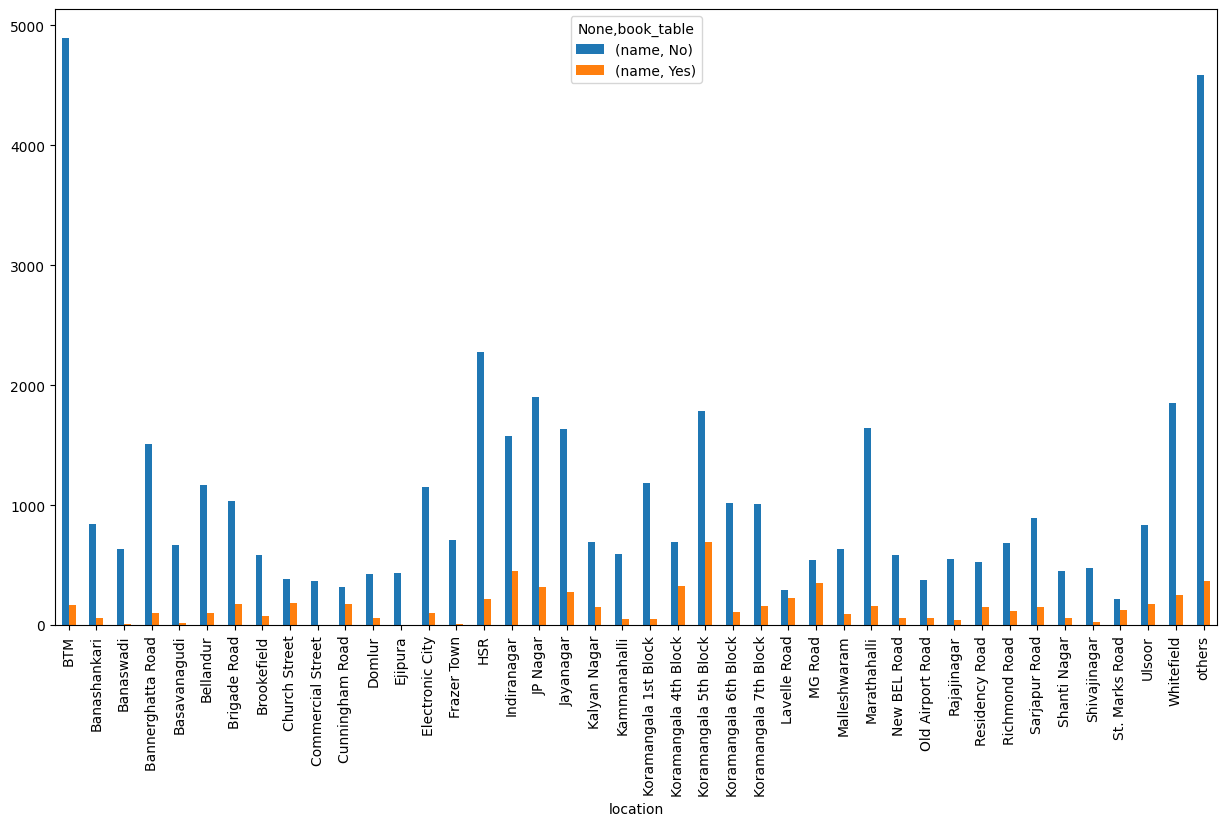

In [36]:
# Plot the new DataFrame as a bar chart with a figure size of (15, 8)
df2.plot(kind = 'bar', figsize = (15,8))

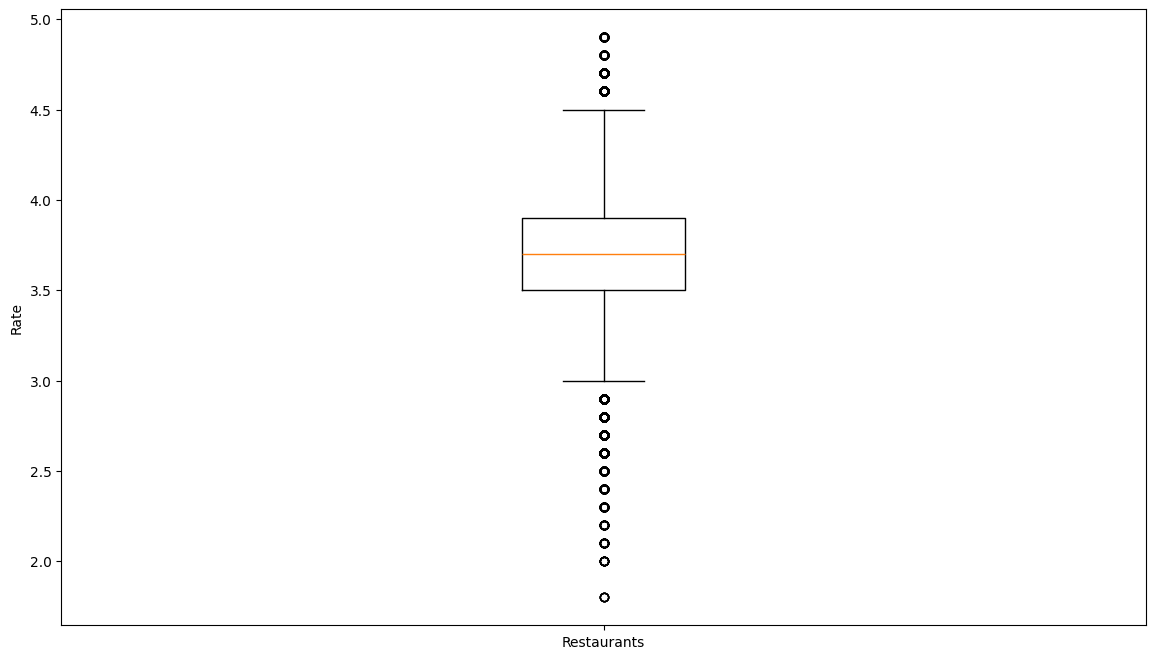

In [37]:
# Create a figure with a specific size (14 inches wide and 8 inches high)
plt.figure(figsize = (14, 8))

# Create a boxplot of the 'rate' column from the DataFrame 'df'
plt.boxplot(df['rate'])

# Set the x-axis ticks to be at position 1, labeled as 'Restaurants'
plt.xticks([1], ['Restaurants'])

# Set the y-axis label as 'Rate'
plt.ylabel('Rate')

# Show the plot
plt.show()

In [38]:
# Print the unique values in the 'rate' column of the DataFrame 'df'
print(df['rate'].unique())

[4.1        3.8        3.7        3.6        4.6        4.
 4.2        3.9        3.1        3.         3.2        3.3
 2.8        4.4        4.3        3.70014186 2.9        3.5
 2.6        3.4        4.5        2.5        2.7        4.7
 2.4        2.2        2.3        4.8        4.9        2.1
 2.         1.8       ]


In [39]:
# Group the DataFrame 'df' by the 'location' and 'Type' columns and count the number of occurrences of each group, then save the result to a CSV file named 'location_Type.csv'
df3 = df.groupby(['location','Type'])['name'].count()
df3.to_csv('location_Type.csv')

# Read the CSV file 'location_Type.csv' into a DataFrame and pivot the table to get the counts of each 'Type' for each 'location'
df3 = pd.read_csv('location_Type.csv')

df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['Type'], fill_value=0, aggfunc='sum')

df3

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      245       16      172   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Old Airport Road          12     5      200       35      164   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      456       71      359   
Whitefield                28    51     1041      137      768   
others                    83   133     2787      276     1553   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            11  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar    

<Axes: xlabel='location'>

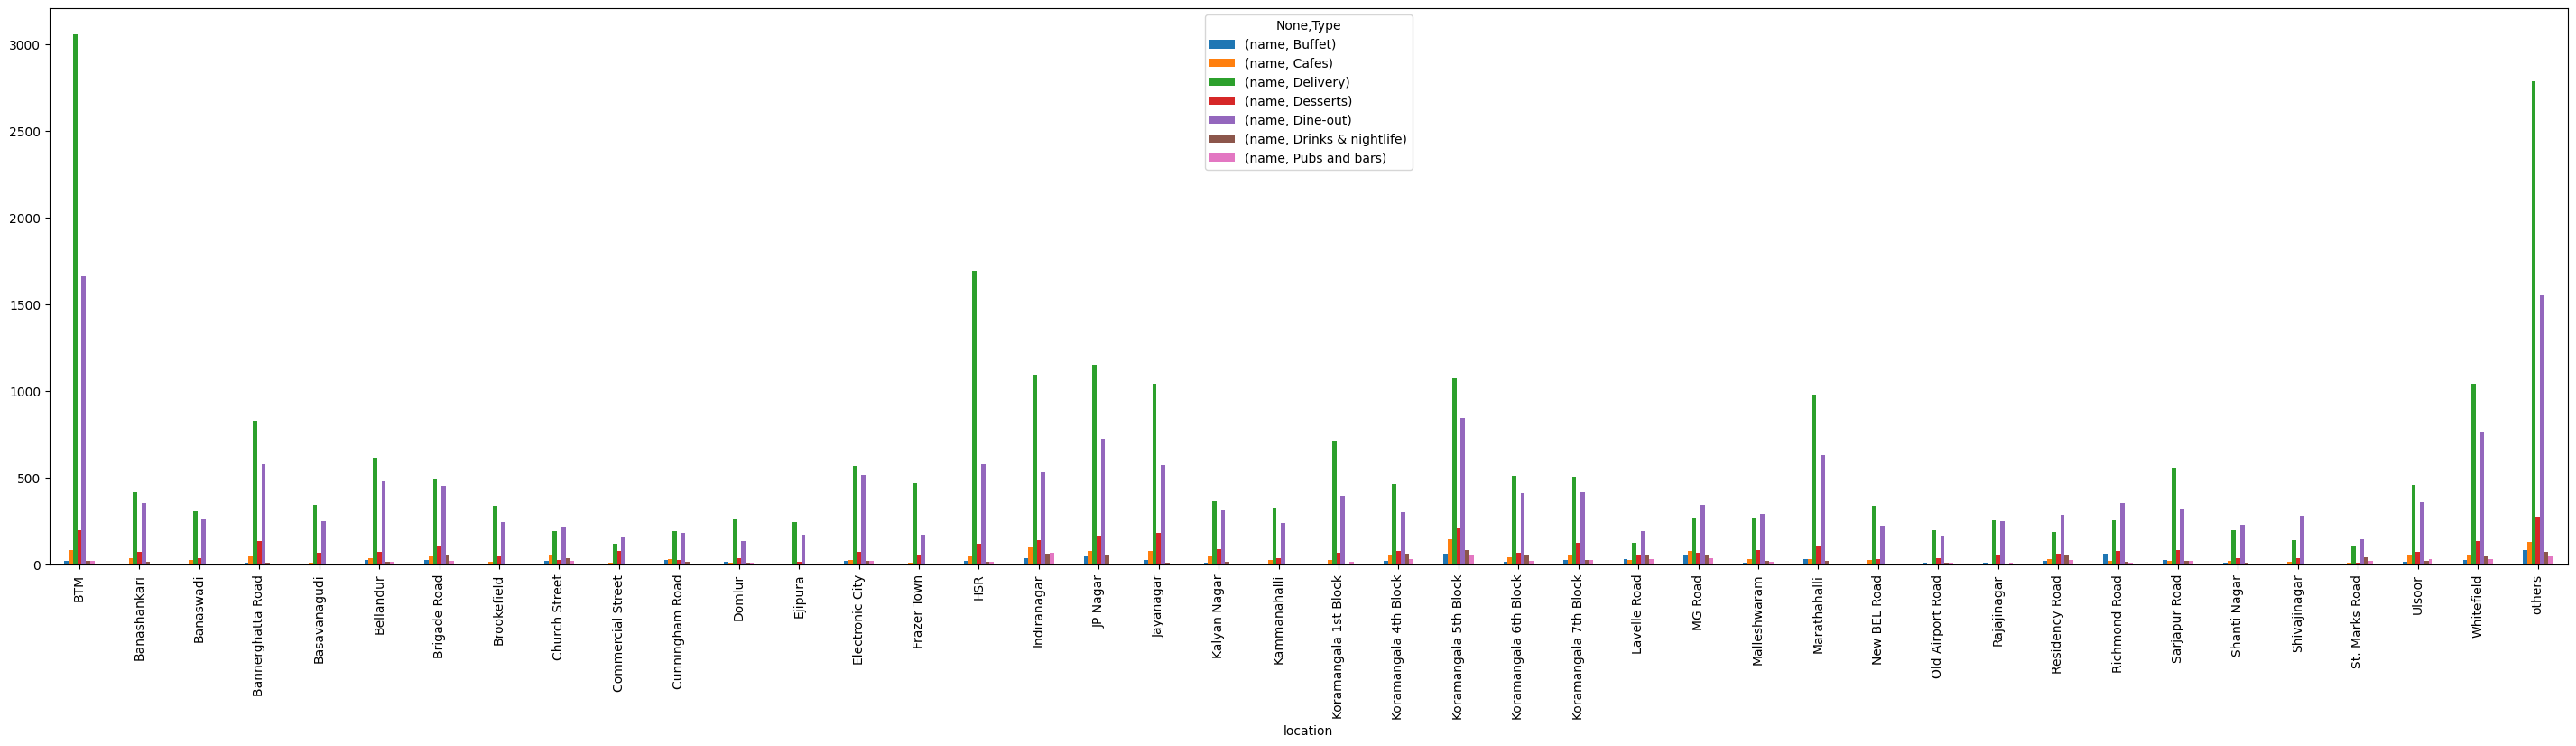

In [40]:
# Create a bar plot with the counts of each 'Type' for each 'location'
df3.plot(kind = 'bar', figsize = (36,8))

In [41]:
# Create a DataFrame containing the 'location' and total 'votes' for each 'location'
df4 = df[['location', 'votes']]

# Drop duplicate rows
df4.drop_duplicates()

# Group by 'location' and sum the 'votes'
df5 = df4.groupby(['location'])['votes'].sum()

# Convert the Series to a DataFrame
df5 = df5.to_frame()

# Sort the DataFrame by 'votes' in descending order
df5 = df5.sort_values('votes', ascending=False)

# Display the first few rows of the DataFrame
df5.head()

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522


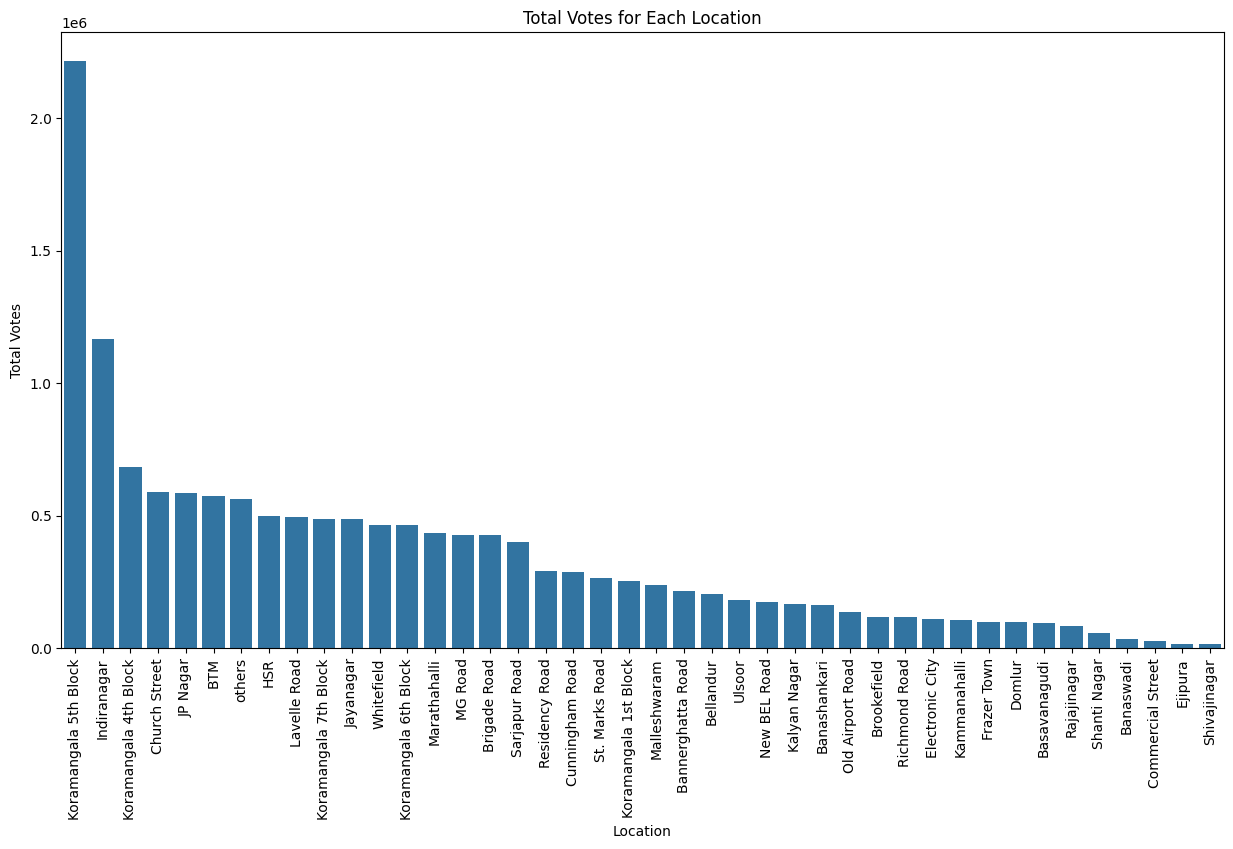

In [42]:
# Create a bar plot to visualize the total votes for each location
plt.figure(figsize = (15,8))
sns.barplot(x=df5.index , y=df5['votes'])
plt.xticks(rotation = 90)
plt.title('Total Votes for Each Location')
plt.xlabel('Location')
plt.ylabel('Total Votes')
plt.show()

In [43]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [44]:
# Create a DataFrame with 'cuisines' and 'votes'
df6 = df[['cuisines', 'votes']]

# Drop duplicate rows
df6.drop_duplicates()

# Group the data by 'cuisines' and calculate the sum of 'votes'
df7 = df6.groupby(['cuisines'])['votes'].sum()

# Convert the Series to a DataFrame
df7 = df7.to_frame()

# Sort the DataFrame by 'votes' in descending order
df7 = df7.sort_values('votes', ascending=False)

# Display the top 5 rows of the DataFrame
df7.head()

,votes
cuisines,
others,11542182
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


In [45]:
# Remove the first row (index 0) from df7
df7 = df7.iloc[1:, :]

#Display the top 5 rows of the updated DataFrame
df7.head()

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
Chinese,101728


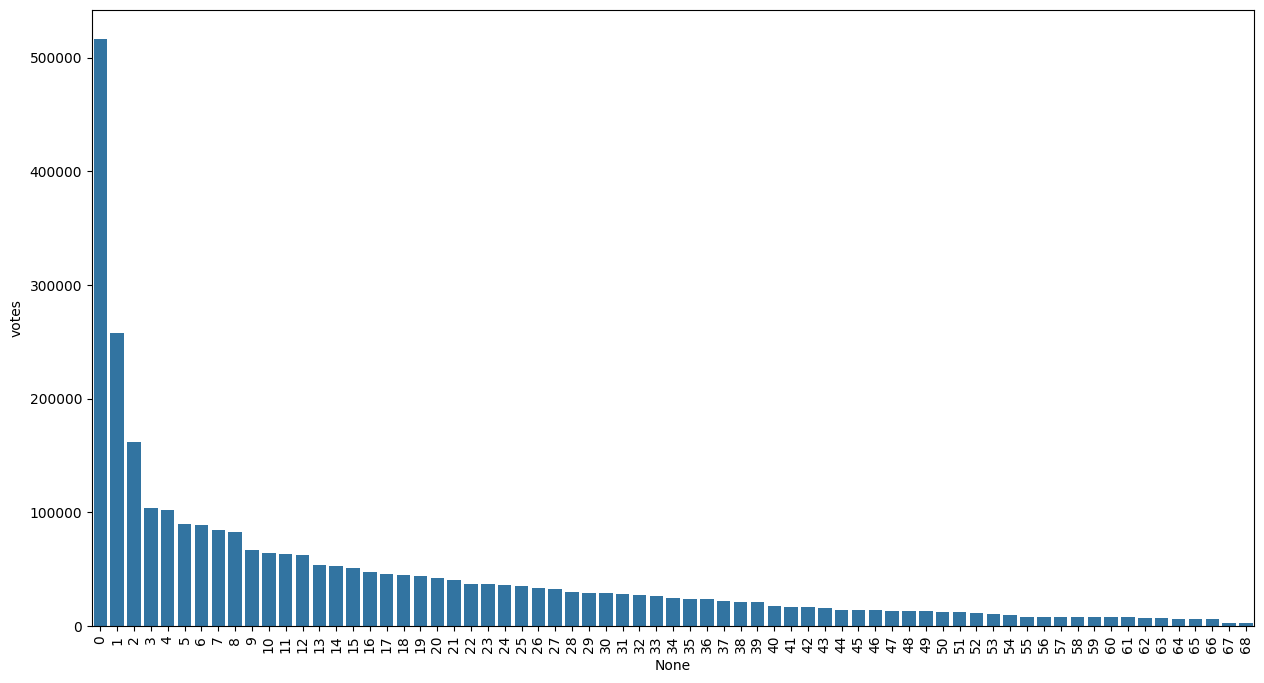

In [46]:
# Reset the index of df7
df7.reset_index(drop=True, inplace=True)

# Plot the barplot again with the updated index
plt.figure(figsize=(15, 8))
sns.barplot(x=df7.index, y=df7['votes'])
plt.xticks(rotation=90)
plt.show()



In [47]:
# Display the column names in the DataFrame
display(df.columns)

# Display the first few rows of the DataFrame
display(df.head())

# Convert the 'Cost2plates' column to string, remove commas, and convert to float
df['Cost2plates'] = df['Cost2plates'].astype(str).str.replace(',', '').astype(float)


Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost2plates', 'Type'],
      dtype='object')

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


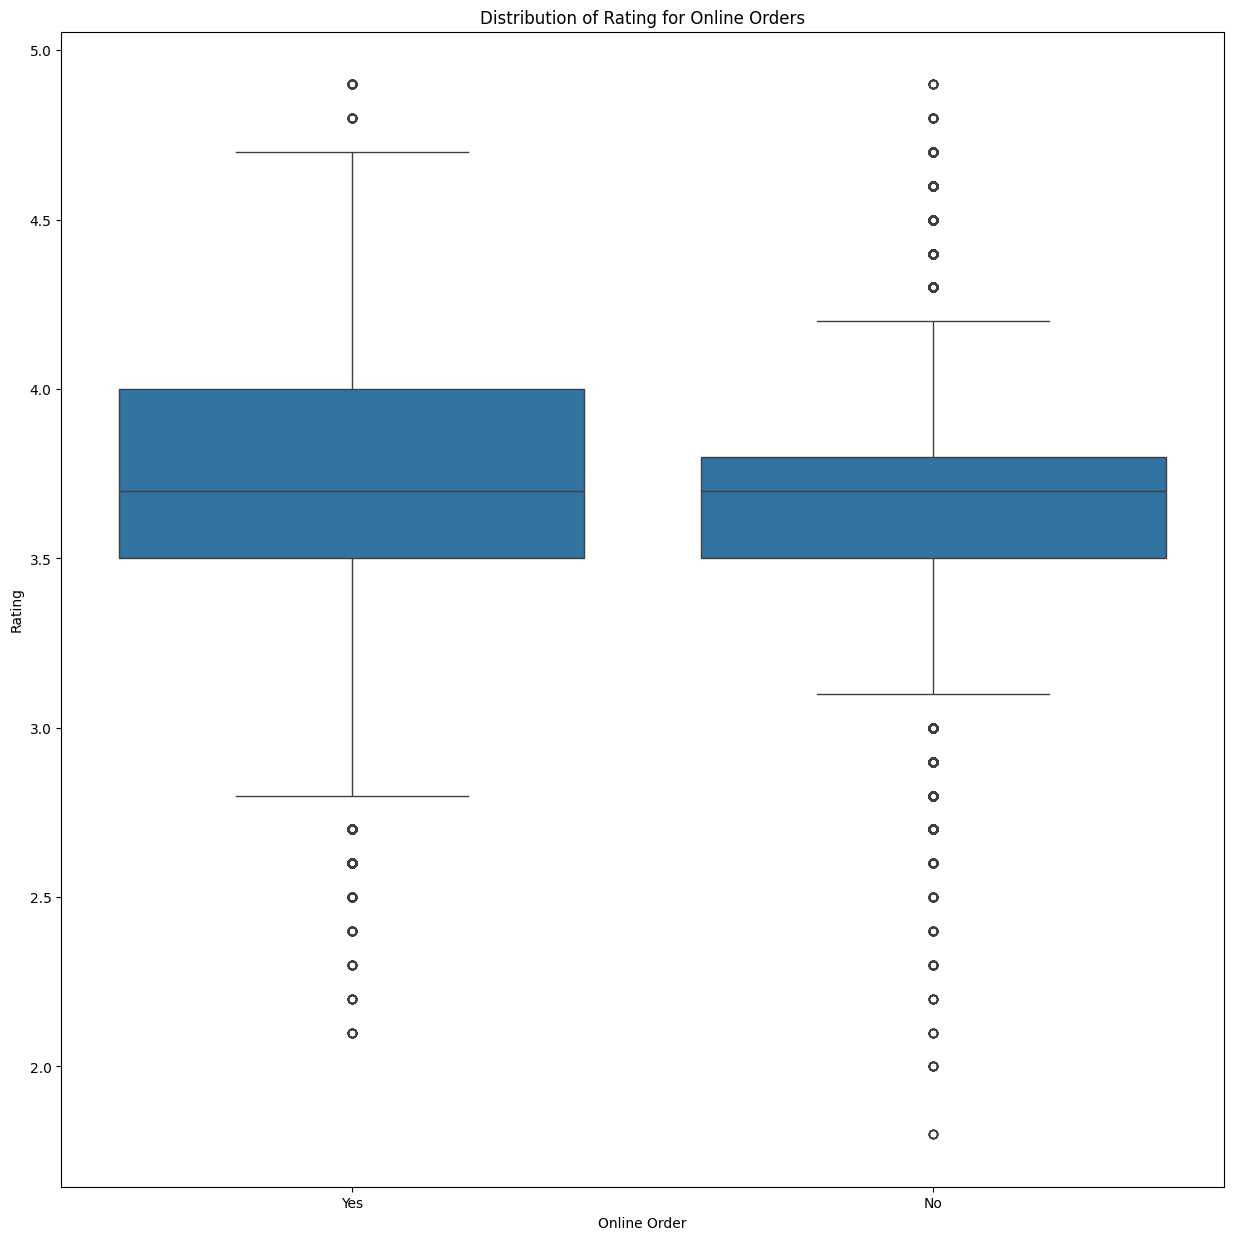

In [66]:
# Plotting a scatterplot of 'approx_cost(for two people)' against 'rate'
plt.figure(figsize=(15, 15))
sns.boxplot(data=df, x='online_order', y='rate')

# Adding title and labels to the plot
plt.title('Distribution of Rating for Online Orders')
plt.xlabel('Online Order')
plt.ylabel('Rating')

# Display the plot
plt.show()

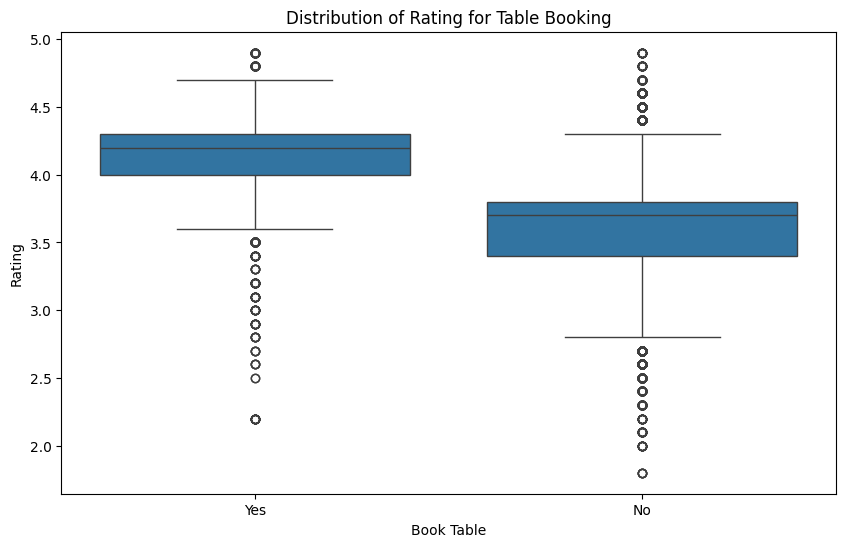

In [67]:
# Plotting a boxplot of 'rate' against 'book_table'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='book_table', y='rate')

# Adding title and labels to the plot
plt.title('Distribution of Rating for Table Booking')
plt.xlabel('Book Table')
plt.ylabel('Rating')

# Display the plot
plt.show()

In [69]:
# Define a function to handle missing values in 'rate'
def handlerate(value):
    if pd.isna(value) or value == 'NEW' or value == '-':
        return np.nan
    elif isinstance(value, float):
        return value
    elif '/' in value:
        value = value.split('/')
        value = value[0]
        return float(value)
    else:
        return float(value)


In [70]:
# Apply the function to 'rate'

df['rate'] = df['rate'].apply(handlerate)
features = ['rate', 'Cost2plates', 'votes']
x = df[features].values

# Standardize the features
x = StandardScaler().fit_transform(x)


In [71]:
# Drop rows with missing values
df.dropna(inplace=True)

In [72]:
df['rate'] = df['rate'].fillna(df['rate'].mean())
df['Cost2plates'] = df['Cost2plates'].fillna(df['Cost2plates'].mean())
df['votes'] = df['votes'].fillna(df['votes'].mean())


In [73]:
# Select features for PCA
features = ['rate', 'Cost2plates', 'votes']
x = df[features].values



In [74]:
# Standardize the features
x = StandardScaler().fit_transform(x)

In [75]:
# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])


In [76]:
# Concatenate principal components with original data
finalDf = pd.concat([principalDf, df[['rate', 'Cost2plates', 'votes']]], axis=1)

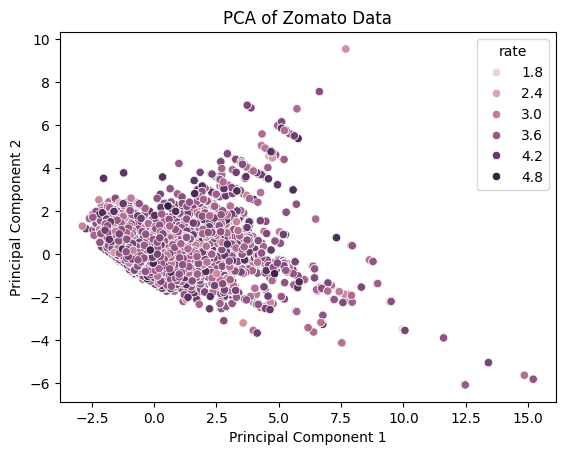

In [77]:
# Visualize results
sns.scatterplot(data=finalDf, x='principal component 1', y='principal component 2', hue='rate')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Zomato Data')
plt.show()

<Figure size 1000x800 with 0 Axes>

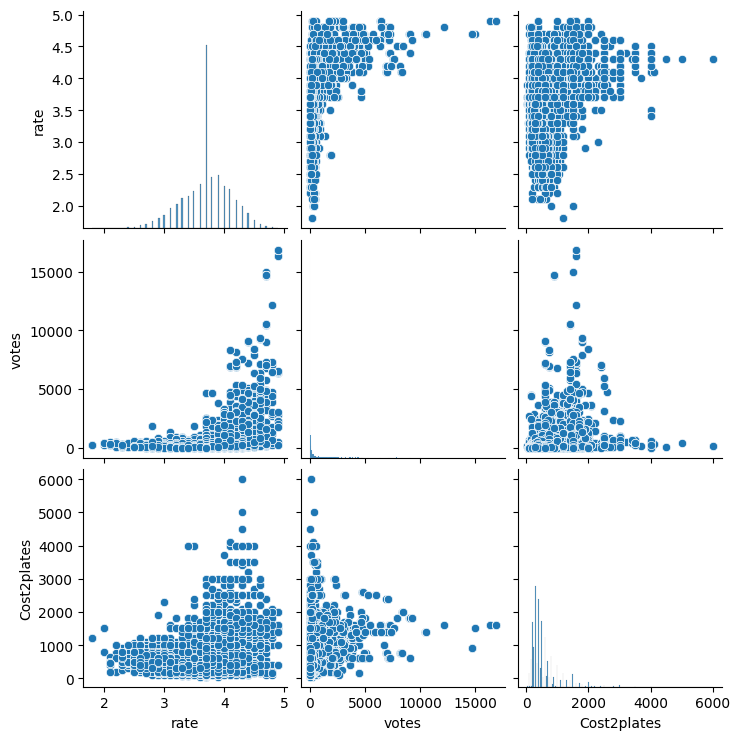

In [87]:
plt.figure(figsize = (10,8))
sns.pairplot(df)
plt.show()

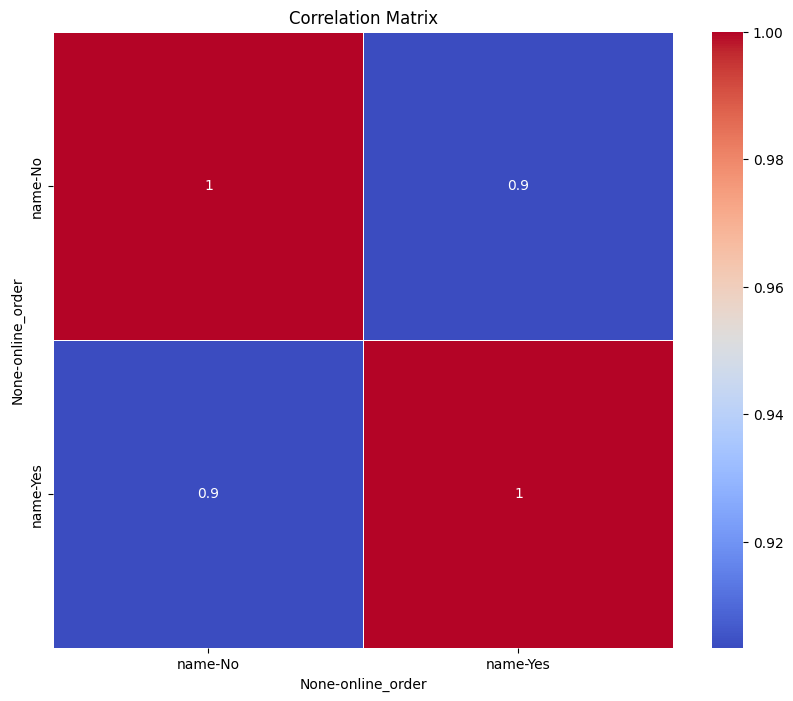

In [94]:
# Compute the correlation matrix
correlation_matrix = df1.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
